##  1. Linear Regression (OLS)

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import mglearn

# Load dataset
X, y = mglearn.datasets.load_extended_boston()

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Train Linear Regression
lr = LinearRegression().fit(X_train, y_train)

# Evaluate model
print("Linear Regression - Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Linear Regression - Test set score: {:.2f}".format(lr.score(X_test, y_test)))


Linear Regression - Training set score: 0.95
Linear Regression - Test set score: 0.61


## 2. Ridge Regression (L2 Regularization)

In [4]:
from sklearn.linear_model import Ridge

# Default alpha = 1.0
ridge = Ridge().fit(X_train, y_train)
print("Ridge (alpha=1.0) - Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Ridge (alpha=1.0) - Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

# Stronger regularization
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Ridge (alpha=10) - Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Ridge (alpha=10) - Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

# Weaker regularization
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Ridge (alpha=0.1) - Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Ridge (alpha=0.1) - Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))


Ridge (alpha=1.0) - Training set score: 0.89
Ridge (alpha=1.0) - Test set score: 0.75
Ridge (alpha=10) - Training set score: 0.79
Ridge (alpha=10) - Test set score: 0.64
Ridge (alpha=0.1) - Training set score: 0.93
Ridge (alpha=0.1) - Test set score: 0.77


##  3. Coefficient Comparison Plot

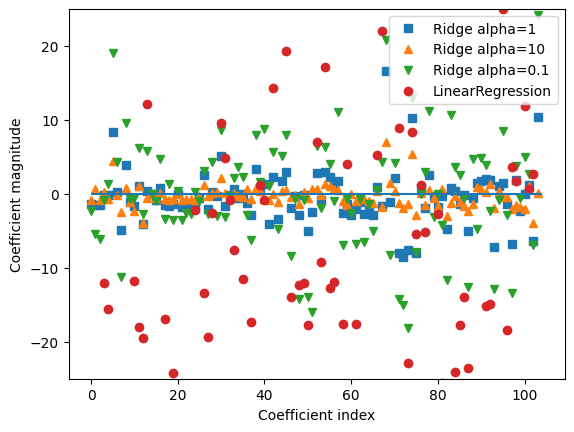

In [5]:
import matplotlib.pyplot as plt

plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")

plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.show()


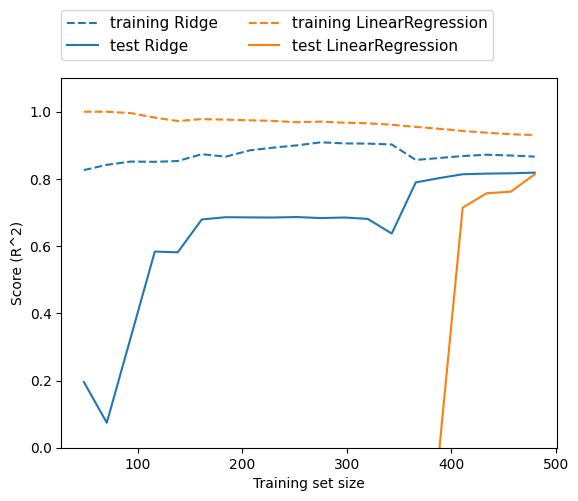

In [6]:
mglearn.plots.plot_ridge_n_samples()


# Lasso Regression

##  1. Basic Lasso Regression (default alpha = 1.0)

In [7]:
from sklearn.linear_model import Lasso
import numpy as np

lasso = Lasso().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))


Training set score: 0.29
Test set score: 0.21
Number of features used: 4


## 2. Lasso with alpha=0.01 and increased max_iter

In [8]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))


Training set score: 0.90
Test set score: 0.77
Number of features used: 33


## 3. Lasso with very small alpha=0.0001 (almost no regularization)

In [9]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))


Training set score: 0.95
Test set score: 0.64
Number of features used: 96


##  4. Coefficient Plot (Optional Visualization)

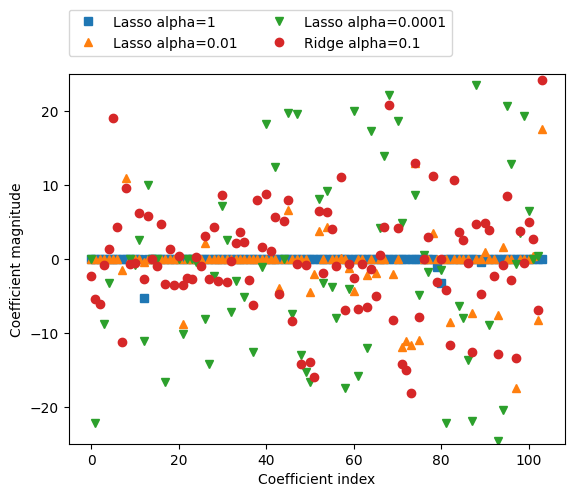

In [10]:
import matplotlib.pyplot as plt

plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")

plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.show()


In [ ]:
!pip install mglearn